<a href="https://colab.research.google.com/github/pravincoder/Machine-Learning-Models-Tutorial/blob/main/RandomForestonGolfDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-requiste :-

1.   Decision Tree?
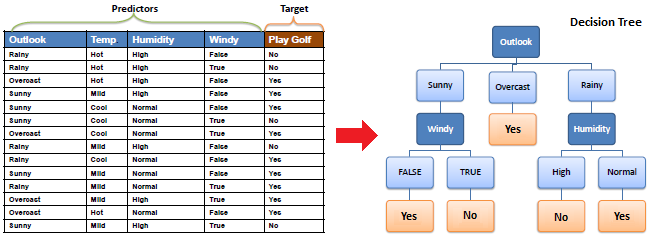


2.   What is bagging (Ensemble Technique) and boosting ?

| **Feature**           | **Bagging**                                                        | **Boosting**                                                    |
|------------------------|--------------------------------------------------------------------|-----------------------------------------------------------------|
| **Definition**         | Builds multiple independent models in parallel using random data samples | Builds models sequentially, each model correcting errors of the previous |
| **Goal**              | Reduce variance and avoid overfitting                             | Reduce bias and improve weak learners                           |
| **Model Dependency**  | Models are independent of each other                              | Models are dependent, each influenced by the previous model     |
| **Weighting of Data** | Equal weighting of all data samples                               | Misclassified samples get higher weights to focus learning      |
| **Combining Predictions** | Uses averaging (regression) or majority voting (classification)  | Uses a weighted sum of model predictions for final output       |
| **Overfitting Risk**  | Lower risk of overfitting                                         | Higher risk of overfitting if not tuned well                    |
| **Common Algorithms** | Random Forest, Bagged Trees                                      | AdaBoost, Gradient Boosting, XGBoost                           |
| **Main Focus**        | Reduce error due to high variance                                 | Reduce error due to high bias                                   |
| **Computational Cost** | Usually lower than boosting                                      | Higher due to sequential learning                               |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Random Forest Regression

Random Forest in general is a combination of various decision Tree making a decision/prediction independently, by using a random subset of the dataset.

In case of Regression , the Output of all the decision Tree are Averaged to get the output of the Random Forest Model


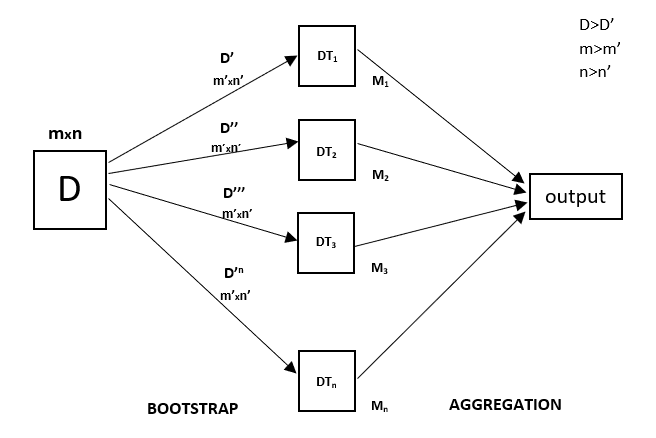

Example :- Choosing a Product based on various Review Rating Value !

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/golf_data_processed.csv')
# /content/drive/MyDrive/golf_data_processed.csv

In [ ]:
data

,Hole,Score,Shot Distance in Yards,Shot Outcome in Yards,Club Type,Break,Tournament Yards,Condition,Outcome
0,1,5,116,108.0,Driver,Drive,121.0,Mostly Cloudy,Rough
1,1,5,8,5.0,SW,Chip,121.0,Mostly Cloudy,Green
2,1,5,3,3.0,Putter,Putt,121.0,Mostly Cloudy,Green
3,2,6,112,70.0,Hybrid,Drive,123.0,Mostly Cloudy,Fairway
4,2,6,42,50.0,PW,Drive,123.0,Mostly Cloudy,Green
...,...,...,...,...,...,...,...,...,...
73,8,4,8,7.0,Putter,Putt,122.0,Haze,Green
74,8,4,1,1.0,Putter,Putt,122.0,Haze,Green
75,9,3,136,125.0,Driver,Driver,135.0,Haze,Rough
76,9,3,11,9.0,Putter,Putt,135.0,Haze,Green


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hole                    78 non-null     int64  
 1   Score                   78 non-null     int64  
 2   Shot Distance in Yards  78 non-null     int64  
 3   Shot Outcome in Yards   78 non-null     float64
 4   Club Type               78 non-null     object 
 5   Break                   78 non-null     object 
 6   Tournament Yards        78 non-null     float64
 7   Condition               78 non-null     object 
 8   Outcome                 78 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.6+ KB


In [ ]:
# Break column has a issue of Name missmatch
data.replace('Driver','Drive',inplace=True)


In [ ]:
# Check all categorical data value count
def get_value_counts(df, col):
  return print(f"Colm :- {col}:- \n {df[col].value_counts()}\n \n")

get_value_counts(data, 'Club Type')
get_value_counts(data, 'Break')
get_value_counts(data, 'Condition')
get_value_counts(data, 'Outcome')

Colm :- Club Type:- 
 Club Type
Putter    32
Hybrid    17
Drive      7
PW         7
SW         5
5i         3
FD         3
8i         2
6i         1
Chip       1
Name: count, dtype: int64
 

Colm :- Break:- 
 Break
Drive    34
Putt     32
Chip     10
Break     1
Chip      1
Name: count, dtype: int64
 

Colm :- Condition:- 
 Condition
Mostly Cloudy    33
Haze             27
Fair             18
Name: count, dtype: int64
 

Colm :- Outcome:- 
 Outcome
Green      57
Rough      16
Fairway     5
Name: count, dtype: int64
 



In [ ]:
# Check if data has nan values in any colm
print(data.isnull().any())

Hole                      False
Score                     False
Shot Distance in Yards    False
Shot Outcome in Yards     False
Club Type                 False
Break                     False
Tournament Yards          False
Condition                 False
Outcome                   False
dtype: bool


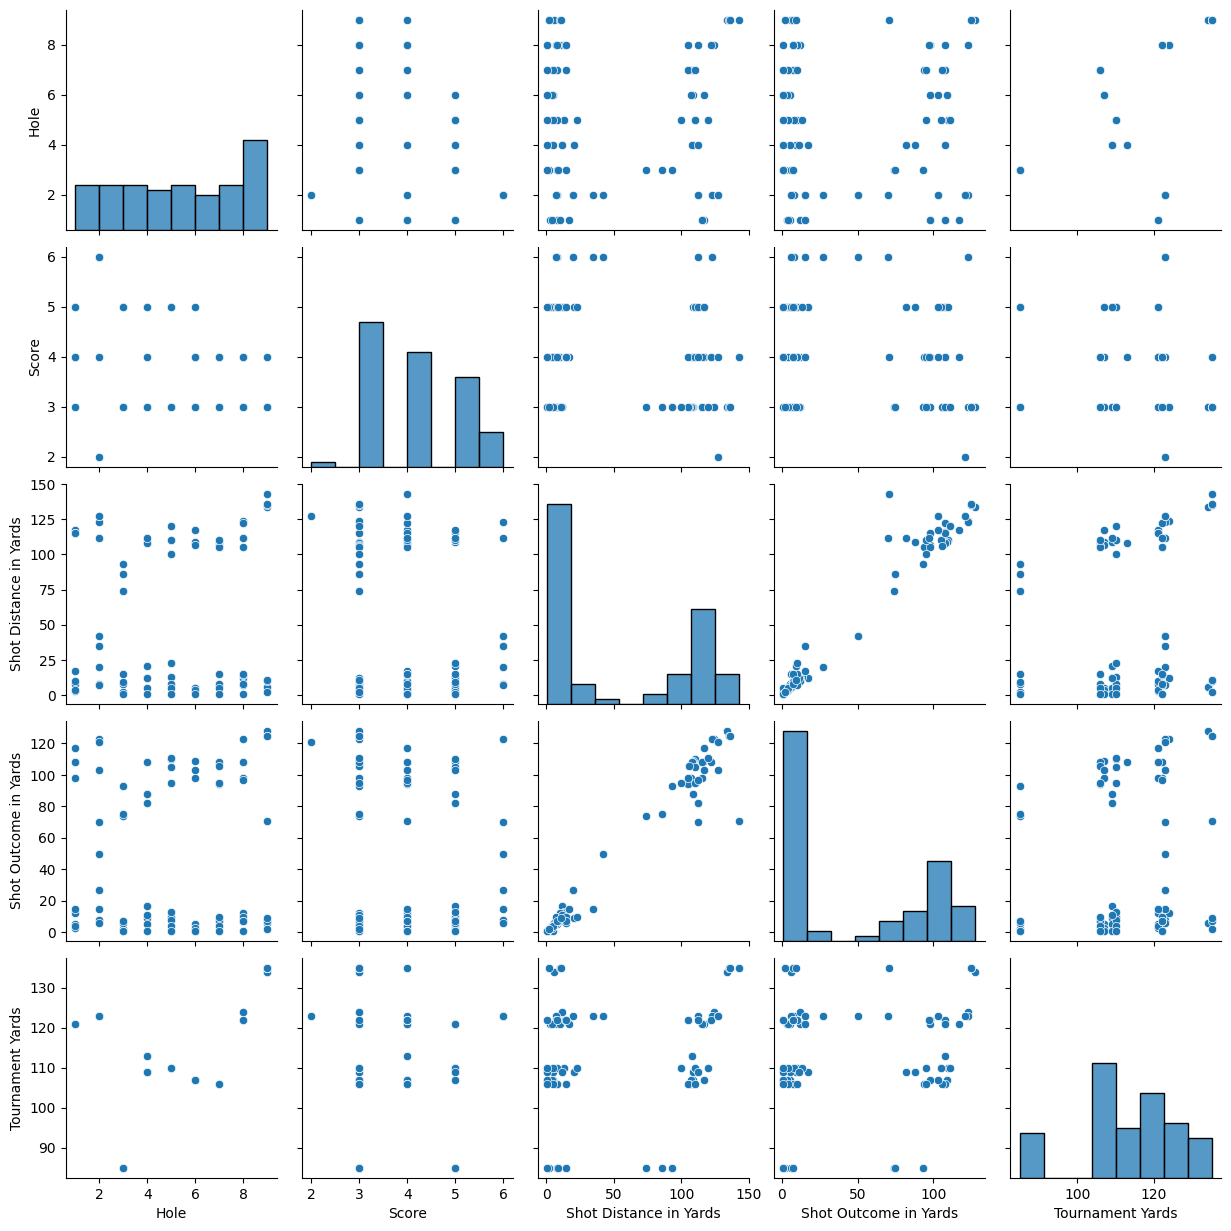

In [ ]:
sns.pairplot(data)

In [ ]:
# Preprocess Categrorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Club Type'] = le.fit_transform(data['Club Type']) # 0 : Putter...
data['Break'] = le.fit_transform(data['Break'])
data['Condition'] = le.fit_transform(data['Condition'])
data['Outcome'] = le.fit_transform(data['Outcome'])



<Axes: >

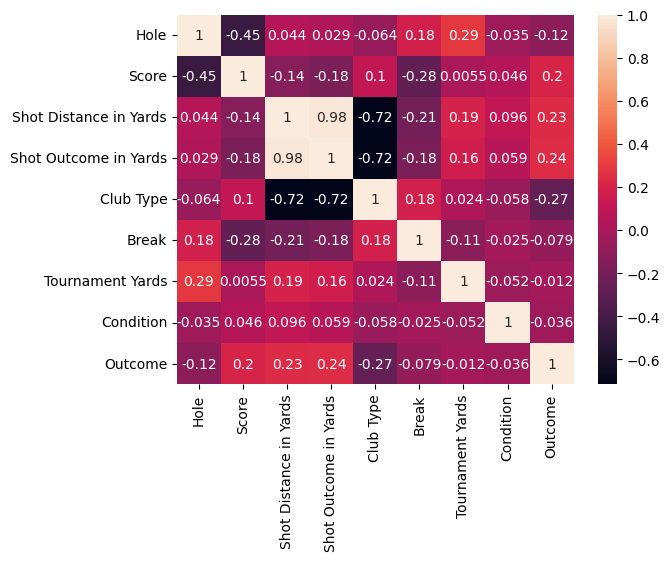

In [ ]:
# See Correlation between features
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Modeling
def modeling(data,y_col,model = RandomForestRegressor()):
  X = data.drop(y_col,axis=1)
  y = data[y_col]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  rf = model
  rf.fit(X_train,y_train)
  return rf.score(X_test,y_test)

# Options for rf criterion :- {'absolute_error', 'friedman_mse', 'poisson', 'squared_error'}

In [ ]:
# Test on some parameters manually
modeling(data,'Score',model=RandomForestRegressor(n_estimators=80,criterion='absolute_error'))

0.27297717065868266

In [ ]:
modeling(data,'Score',model=RandomForestRegressor(max_features=8,n_estimators=150,criterion='squared_error'))

0.19142514970059887

In [ ]:
# Test on some parameters manually
modeling(data,'Score',
         model=RandomForestRegressor(max_features=6,n_estimators=80,criterion='poisson',random_state=42,))

0.19519273952095784

In [ ]:
# get the best parameter for each using randomsearchcv
def get_best_param(data,y_col):
  X = data.drop(y_col,axis=1)
  y = data[y_col]
  param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],  # Try dynamic feature selection
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 20],          # Allow deeper trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]               # Include bootstrap
  }
  rf = RandomForestRegressor()
  random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  random_search.fit(X, y)
  return random_search.best_params_

In [ ]:
param = get_best_param(data,'Score')
print(param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'absolute_error', 'bootstrap': True}


In [ ]:
modeling(data,'Score',model=RandomForestRegressor(**param))

0.25025149700598814

# Random Forest Classification (for `CLub Type`,`break`,`Outcome`)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Modeling function for classification
def modeling_classification(data, y_col, model=RandomForestClassifier()):
    X = data.drop(y_col, axis=1)
    y = data[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf = model
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
# Check score by just passing the model
print(modeling_classification(data,'Club Type'))
print(modeling_classification(data,'Break'))
print(modeling_classification(data,'Outcome'))


0.6666666666666666
0.9166666666666666
0.8333333333333334


In [ ]:

def modeling_classification_with_randcv(data,y_col,model = RandomForestClassifier()):
  X = data.drop(y_col,axis=1)
  y = data[y_col]
  param_grid = {
  'n_estimators': [50, 100, 200, 500],
  'max_features': ['sqrt', 'log2', None],
  'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [None, 5, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'bootstrap': [True, False]
}
  rf = RandomForestClassifier()
  random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
  )
  random_search.fit(X, y)
  return random_search.best_params_

In [ ]:
# get the best param for each model
param_Club_type = modeling_classification_with_randcv(data,'Club Type')
param_Break = modeling_classification_with_randcv(data,'Break')
param_Outcome = modeling_classification_with_randcv(data,'Outcome')

print(f"Club Type :- {param_Club_type} \n")
print(f"Break :- {param_Break} \n")
print(f"Outcome :- {param_Outcome}\n")




Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Club Type :- {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True} 

Break :- {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'log_loss', 'bootstrap': False} 

Outcome :- {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'log_loss', 'bootstrap': True}



In [ ]:
# get the scores of best param model
print(f"Best score for Club Type :- {modeling_classification(data,'Club Type',model=RandomForestClassifier(**param_Club_type))}")
print(f"Best score for Break :- {modeling_classification(data,'Break',model=RandomForestClassifier(**param_Break))}")
print(f"Best score for Outcome :- {modeling_classification(data,'Outcome',model=RandomForestClassifier(**param_Outcome))}")
#

Best score for Club Type :- 0.6666666666666666
Best score for Break0.9166666666666666
Best score for Outcome0.875


## Conclusion on RFR and RFC

